In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import PercentFormatter as pf

In [2]:
with open(r"C:\gree\histo.txt") as file:
    a = file.read().splitlines()

In [3]:
len(a)

10000

In [4]:
deg=np.empty((10,10000))

x=0
for line in a:
    ar = np.fromstring(line, dtype=float, sep="\t")
    y = 0
    for num in ar:
        deg[y,x] = num
        y=y+1
    x=x+1
    
print(deg[2,1000])

319.0


C:\Users\etcha\AppData\Local\Temp\ipykernel_14884\2300958868.py:5: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  ar = np.fromstring(line, dtype=float, sep="\t")


In [5]:
coefs=np.empty(10)

x=0
for col in deg:
    coefs[x]=math.sin(math.pi*col[0]/180)
    x+=1
print(deg[9])

[89.  32.8 74.7 ...  0.   0.   0. ]


In [6]:
bigArray=[]
dweights=[]

x=0
for col in deg:
    bigArray=np.append(bigArray,col[1:])
    dumb=np.empty(9999)
    y=0
    for num in col[1:]:
        dumb[y]=coefs[x]
        y+=1
    dweights=np.append(dweights,dumb)
    x+=1
    
##for some reason all data in bigArray past index 93300 is zero; possibly to do with the error above
#bigArray=bigArray[:93300]
#dweights=dweights[:93300]

zeros=np.where(bigArray==0)[0]

bigArray=np.delete(bigArray,zeros)
dweights=np.delete(dweights,zeros)
    
np.where(bigArray==0)[0]

array([], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

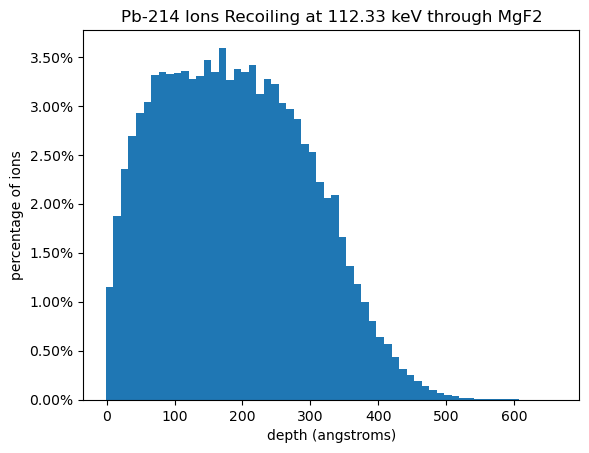

In [7]:
max1=np.amax(bigArray)
n = sum(dweights)
histo3=plt.hist(bigArray, bins=60, weights=dweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions")
plt.title("Pb-214 Ions Recoiling at 112.33 keV through MgF2")
plt.gca().yaxis.set_major_formatter(pf(1))
plt.show

In [8]:
igls=[0.003805,0.030269,0.059618,0.087156,0.112045,0.133530,0.150958,0.163799,0.171663,0.069703]
bigArray2=[]
iweights=[]

x=0
for col in deg:
    bigArray2=np.append(bigArray2,col[1:])
    dumb=np.empty(9999)
    y=0
    for num in col[1:]:
        dumb[y]=igls[x]
        y+=1
    iweights=np.append(iweights,dumb)
    x+=1
    
zeros=np.where(bigArray2==0)[0]

bigArray2=np.delete(bigArray2,zeros)
iweights=np.delete(iweights,zeros)

<function matplotlib.pyplot.show(close=None, block=None)>

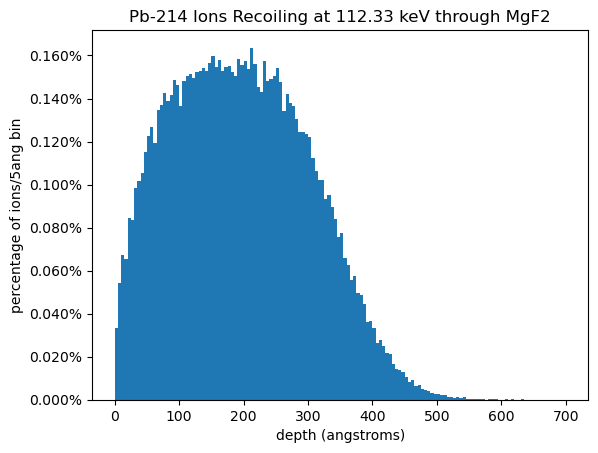

In [9]:
n=bigArray2.size
g=5
histo4=plt.hist(bigArray2, bins=np.arange(0,700+g,g), weights=iweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/5ang bin")
plt.title("Pb-214 Ions Recoiling at 112.33 keV through MgF2")
plt.gca().yaxis.set_major_formatter(pf(1))
plt.show

In [10]:
with open(r"C:\gree\lead.txt") as file:
    b = file.read().splitlines()

In [11]:
deg=np.empty((10,10000))

x=0
for line in b:
    ar = np.fromstring(line, dtype=float, sep="\t")
    y = 0
    for num in ar:
        deg[y,x] = num
        y=y+1
    x=x+1
    
print(deg[2,1000])

948.0


In [12]:
bigArray=[]
dweights=[]

x=0
for col in deg:
    bigArray=np.append(bigArray,col[1:])
    dumb=np.empty(9999)
    y=0
    for num in col[1:]:
        dumb[y]=coefs[x]
        y+=1
    dweights=np.append(dweights,dumb)
    x+=1
    
##for some reason all data in bigArray past index 93300 is zero; possibly to do with the error above
#bigArray=bigArray[:93300]
#dweights=dweights[:93300]

zeros=np.where(bigArray==0)[0]

bigArray=np.delete(bigArray,zeros)
dweights=np.delete(dweights,zeros)
    
np.where(bigArray==0)[0]

array([], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

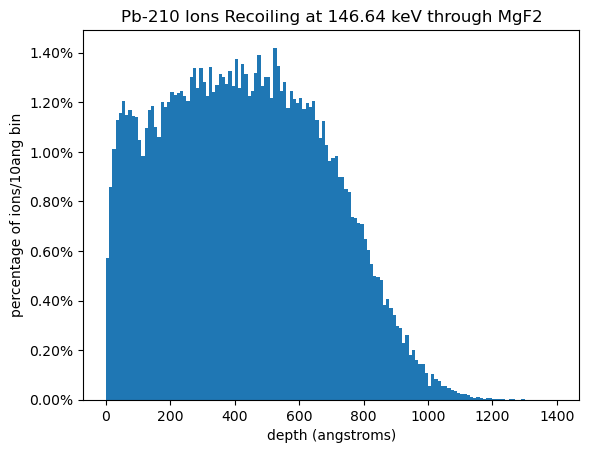

In [13]:
max2=np.amax(bigArray)
n=sum(dweights)
g=10
histo=plt.hist(bigArray, bins=np.arange(0,1400+g,g), weights=dweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/10ang bin")
plt.title("Pb-210 Ions Recoiling at 146.64 keV through MgF2")
plt.gca().yaxis.set_major_formatter(pf(1))
plt.show

In [14]:
histo[1][119]

1190

<function matplotlib.pyplot.show(close=None, block=None)>

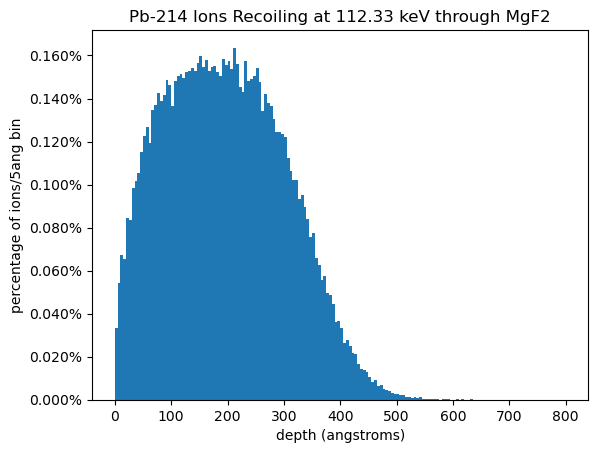

In [15]:
n=bigArray2.size
g=5
histo2=plt.hist(bigArray2, bins=np.arange(0,800+g,g), weights=iweights/n)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/5ang bin")
plt.title("Pb-214 Ions Recoiling at 112.33 keV through MgF2")
plt.gca().yaxis.set_major_formatter(pf(1))
plt.show

In [16]:
histo2[1][119]

595

In [17]:
final=[]
fweights=[]

for p1 in histo[0]:
    for p2 in histo2[0]:
        fweights=np.append(fweights,p1*p2)
        fweights=np.append(fweights,p1*p2)
        
for d1 in histo[1][:-1]:
    for d2 in histo2[1][:-1]:
        final=np.append(final,d2-d1)
        final=np.append(final,d1+d2)

1.0000000000000049

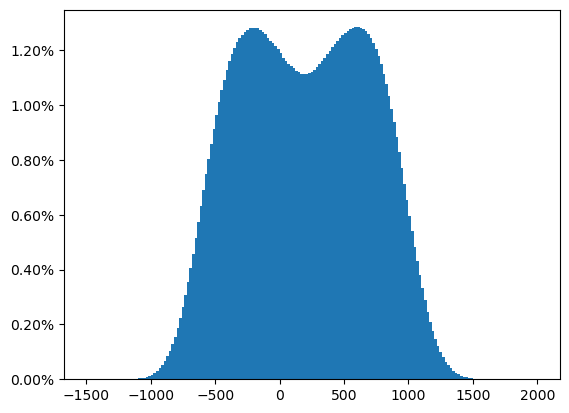

In [18]:
n=final.size
s=sum(fweights)
w=20
histo5=plt.hist(final, bins=np.arange(-1500,2000+w,w), weights=fweights/(s))
histo5
plt.gca().yaxis.set_major_formatter(pf(1))
sum(histo5[0])

<function matplotlib.pyplot.show(close=None, block=None)>

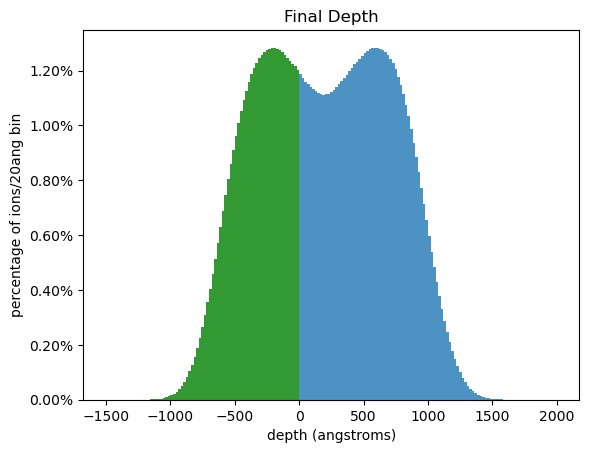

In [19]:
n=final.size
s=sum(fweights)
w=20
fig, ax = plt.subplots()
N, bins, patches=ax.hist(final, bins=np.arange(-1500,2000+w,w), weights=fweights/(s), alpha=.8)
plt.xlabel("depth (angstroms)")
plt.ylabel("percentage of ions/20ang bin")
plt.title("Final Depth")
plt.gca().yaxis.set_major_formatter(pf(1))
for i in range(0,len(patches)):
    if histo5[1][i] < 0:
       patches[i].set_facecolor('g')
plt.show

In [20]:
histo5[1][len(histo5[1])-1]

2000

In [21]:
xenon=0
x=0
for bar in histo5[1]:
    if bar < 0:
        xenon += histo5[0][x]
        x+=1
        
xenon = xenon
print("{}% of ions end in the LXe!".format(xenon*100))

38.78093481371854% of ions end in the LXe!


In [22]:
histo5[1][np.argmax(histo5[0])]

580

In [23]:
np.savetxt('mygram.txt', final,delimiter=",",fmt='%s')

In [24]:
np.savetxt('mygram2.txt', fweights,delimiter=",",fmt='%s')

In [25]:
final

array([   0.,    0.,    5., ..., 2180., -595., 2185.])